pip install opencv_python-4.5.5-cp310-cp310-win_amd64.whl

In [18]:
import cv2
import tensorflow
import numpy
import pandas
import seaborn
import matplotlib.pyplot
import numpy as np

ImportError: DLL load failed while importing cv2: The specified module could not be found.

In [3]:
from google.colab.patches import cv2_imshow #only used when running in Google Colab
def GC_imshow(title, img ):
  print(title)
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

ModuleNotFoundError: No module named 'google.colab'

In [4]:
fileName = "t_character.png" #template

#RGB images in BGR order in OpenCV
t_character = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

# Print error message if image is null
if t_character is None:
    print('Could not read image')
else:
    print("Image file read success...")

NameError: name 'cv2' is not defined

In [17]:
from tempfile import template
fileName = "text_image.png"

#RGB images in BGR order in OpenCV
text_image = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
template_matching_image = text_image

# Print error message if image is null
if text_image is None:
    print('Could not read image')
else:
    print("Image file read success...")

Image file read success...


In [5]:
def GCImshow(title, img):
    """
    function to make windows display work in jupyter notebook
    - shows image in a separate window,
    - waits for any key to close the window.

    """

    cv2.startWindowThread()
    GC_imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Original image


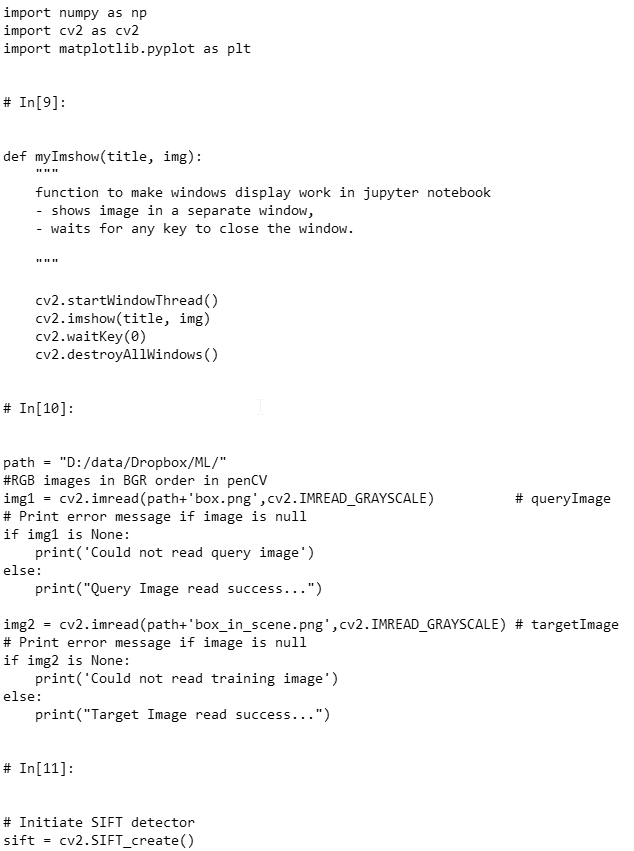

In [6]:
GCImshow('Original image', text_image)

---



<h1> My own Template matching <h1>

In [22]:
import numpy as np
R = np.zeros(text_image.shape)
#Sliding template through the y-axis
for i in range(text_image.shape[0] - t_character.shape[0]):

    #Sliding template through the x-axis
    for j in range(text_image.shape[1] - t_character.shape[1]):

        #Sliding each template pixel and use to calculate the sum square error
        for k in range(t_character.shape[0]):
            for l in range(t_character.shape[1]):

                #Calculate the sum square error to find how it matches.
                R[i, j ] += (np.int16(t_character[k, l]) - np.int16(text_image[i+k, j+l]))**2

In [23]:
#Find index of matching
count = 0
temp = []
for i in range(text_image.shape[0]-t_character.shape[0]):
    for j in range(text_image.shape[1]-t_character.shape[1]):
        if R[i,j] == 0:
            count += 1
            temp.append([i, j])
            #print(f"index = {i}, {j}")
print("Character matches = ", count)

Character matches =  0


In [19]:
#Create boundary of 9*8 (relate to t_character)
for i in range(count):
    x, y = temp[i]
    template_matching_image[x,y:y+8] = 0
    template_matching_image[x:x+9,y] = 0
    template_matching_image[x+9,y:y+8] = 0
    template_matching_image[x:x+9,y+8] = 0

In [20]:
#Save new image with boundary
import cv2
import os

# Filename
filename = 'savedImage.jpg'

cv2.imwrite(filename, template_matching_image)

True

With boundary


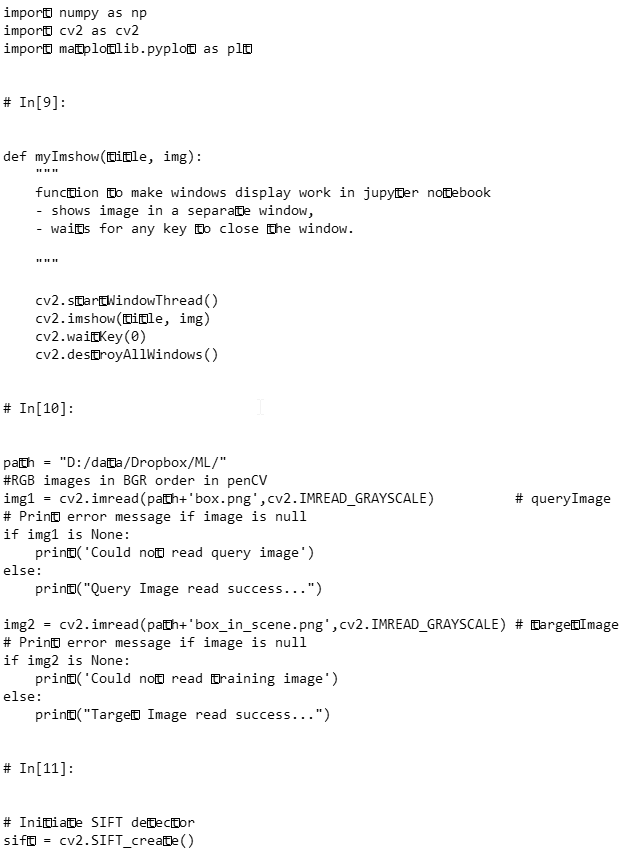

In [21]:
GCImshow('With boundary', template_matching_image)

************************************

<h1> OpenCV template matching <h1>